## Section 1:  Data Preprocessing for the quantified ingredients 

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
#installing all the libraries needed for the task
import pandas as pd
import json
import nltk
from pandas.io.json import json_normalize
nltk.download('stopwords')
nltk.download('punkt')
import re  
from nltk.corpus import stopwords
stops1 = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
#converting json to pandas dataframe
with open('/gdrive/My Drive/Colab Notebooks/layer1.json', 'r') as f:
    data = json.load(f)
    
df = pd.DataFrame(data)
df.head()

In [0]:
df.ingredients.head(20)

0     [{'text': '6 ounces penne'}, {'text': '2 cups ...
1     [{'text': '1 c. elbow macaroni'}, {'text': '1 ...
2     [{'text': '8 tomatoes, quartered'}, {'text': '...
3     [{'text': '2 12 cups milk'}, {'text': '1 12 cu...
4     [{'text': '1 (3 ounce) package watermelon gela...
5     [{'text': '12 cup shredded coconut'}, {'text':...
6     [{'text': '2 Chicken thighs'}, {'text': '2 tsp...
7     [{'text': '6 -8 cups fresh rhubarb, or'}, {'te...
8     [{'text': '8 ounces, weight Light Fat Free Van...
9     [{'text': '2 cups flour'}, {'text': '1 tablesp...
10    [{'text': '1/2 cup green onions, chopped'}, {'...
11    [{'text': '1 teaspoon fennel seeds'}, {'text':...
12    [{'text': '1 (750 ml) bottle rose wine, chille...
13    [{'text': '14 cup butter'}, {'text': '34 cup b...
14    [{'text': '200 grams Cake flour'}, {'text': '1...
15    [{'text': '1 can tomato sauce'}, {'text': '1 c...
16    [{'text': '1 12 lbs ground beef'}, {'text': '3...
17    [{'text': '1 (10 ounce) package frozen cho

In [0]:
ingredients = pd.io.json.json_normalize(data, record_path='ingredients')
ingredients.tail()


,text
9605389,8 cups water
9605390,2/3 cup packed light brown sugar
9605391,1 teaspoon molasses
9605392,2 (3-inch) cinnamon sticks
9605393,1 cup medium-grind coffee (not espresso)


In [0]:
#Counting the number of occurrences of quantities
#list = {"ounce","cup","teaspoon","lbs","tbsp","pound","piece","slice","dozen","gram","pinch","tablespoons"}
# making series 
#series = pd.Series(list) 
  
ingredients.text.str.count("shot")
ingredients.text.str.count("shot").sum()
#ingredients.info

898

In [0]:
#Creating a df of the counts and visualising it
data = [['ounce', 663540], ['cup', 2671960], ['teaspoon', 1436012],['lbs',72205],['tbsp',133997],['pound',162761],['piece',86804],['slice',363711],['dozen',2396],['gram',53798],['pinch',54814],['tablespoons',703579],['bushel',59],['drop',9403],['dash',41050],['gallon',3690],['glass',1584],['pint',22345],['quart',50416],['scoop',2801],['shot',898]] 
df_quantity = pd.DataFrame(data, columns = ['Unit', 'Occurences'])
df_quantity.head(20)


,Unit,Occurences
0,ounce,663540
1,cup,2671960
2,teaspoon,1436012
3,lbs,72205
4,tbsp,133997
5,pound,162761
6,piece,86804
7,slice,363711
8,dozen,2396
9,gram,53798


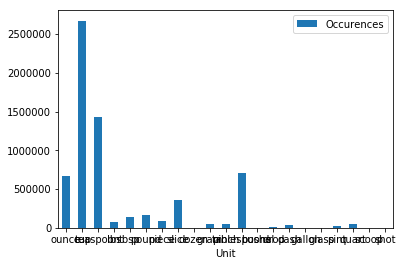

In [0]:
#Visualising the number of occurences of the units
import matplotlib.pyplot as plt

ax = df_quantity.plot.bar(x='Unit', y='Occurences', rot=0)





In [0]:
#Data Cleansing starts
train1 = pd.DataFrame(pd.concat([ ingredients['text']], axis=1))
train1.head()

,text
0,6 ounces penne
1,2 cups Beechers Flagship Cheese Sauce (recipe ...
2,"1 ounce Cheddar, grated (1/4 cup)"
3,"1 ounce Gruyere cheese, grated (1/4 cup)"
4,1/4 to 1/2 teaspoon chipotle chili powder (see...


In [0]:
train1.to_csv(r'/gdrive/My Drive/Colab Notebooks/d_ingredients_quantity.txt', header=True, index=False, sep='\t', mode='a')


In [0]:
def clean_sent(sent):
    #sent = sent.lower()
    sent = re.sub(u'[_"\-;%()|+&=*%.,!?:#$@\[\]/]',' ',sent)
    return sent
def clean(df):
    df['text'] = df.text.map(lambda x: ' '.join([ word for word in
                                                         nltk.word_tokenize(clean_sent(x))]).encode('utf-8'))

    #df['instructions'] = df.instructions.map(lambda x: ' '.join([ word for word in
                                                         #nltk.word_tokenize(clean_sent(x))]).encode('utf-8'))
def removeStopWords(df, stop):
	df['text'] = df.text.map(lambda x: ' '.join([word for word in nltk.word_tokenize(x.decode('utf-8'))
                                                         if word not in stop]).encode('utf-8'))
	#df['instructions'] = df.instructions.map(lambda x: ' '.join([word for word in nltk.word_tokenize(x.decode('utf-8'))
                                                         #if word not in stop]).encode('utf-8'))

In [0]:
#Calling Clean and Stop words on Ingredients df
clean(train1)
removeStopWords(train1, stops1)

In [0]:
#Calling out the pre-processed data frame named train1
train1.head()

,text
0,b'6 ounces penne'
1,b'2 cups Beechers Flagship Cheese Sauce recipe...
2,b'1 ounce Cheddar grated 1 4 cup'
3,b'1 ounce Gruyere cheese grated 1 4 cup'
4,b'1 4 1 2 teaspoon chipotle chili powder see N...


In [0]:
#Writing to a CSV
#train1.to_csv(r'/gdrive/My Drive/Colab Notebooks/d_ingredients_quantity.csv', index=False, header=True)
train1.to_csv(r'/gdrive/My Drive/Colab Notebooks/d_ingredients_quantity.txt', header=True, index=False, sep='\t', mode='a')


## Section 2 : Implementation for word embeddings


In [0]:
! pip install gensim
! pip install seaborn
! pip install elasticsearch
! pip install esengine
! pip install ipdb

     |████████████████████████████████| 92kB 2.6MB/s 
ERROR: s3fs 0.2.1 has requirement six>=1.12.0, but you'll have six 1.10.0 which is incompatible.
ERROR: jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.16 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you'll have six 1.10.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: six 1.12.0
    Uninstalling six-1.12.0:
      Successfully uninstalled six-1.12.0


  Stored in directory: /root/.cache/pip/wheels/59/24/91/695211bd228d40fb22dff0ce3f05ba41ab724ab771736233f3
Successfully built ipdb


In [0]:
from __future__ import print_function

# Handle data
import json
import operator
import collections
import re

import numpy as np
import pandas as pd

from pprint import pprint

# Model Algorithms
from gensim.models import FastText

# Modelling Helpers, see above the description
from sklearn.manifold import TSNE

from gensim.models import KeyedVectors
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline
import os

In [0]:
os.chdir('/gdrive/My Drive/Colab Notebooks/')
from preprocess import *
from sub_find import *
from true_subs import *
from constants import *
from graph_evaluation import *

In [0]:
from recipe import Recipe
def load_data_from_file(filename=None, ing_file_name=None, local=True, save=False):
    return load_data(file_name=filename, ing_file_name=ing_file_name, local=local, save=save)
    

In [0]:
os.chdir('/gdrive/My Drive/Colab Notebooks/')
recipes = load_data_from_file("layer1.json", ing_file_name = "d_ingredients_quantity.txt",local=True, save=False )
clean_recipes = [x.proccessed_ing_list for x in recipes]
#recipes = load_data_from_file("100ksample2", "dbpedia_ingredients.txt")
#sample100k2 = [x.proccessed_ing_list for x in recipes]
#clean_recipes.extend(sample100k2) 
type(clean_recipes)

In [0]:
num_features = 300    # Word vector dimensionality                      
min_word_count = 3                        
num_workers = 4       # Number of CPUs
context = 8          # Context window size; 
                      # let's use avg recipte size                                                                                  
downsampling = 1e-3   
                    # higher-frequency words are randomly downsampled

# Initialize and train the model 
model = FastText(workers=num_workers, \
            size=num_features,window=context, min_count = min_word_count)
model.build_vocab(clean_recipes)
model.train(sentences = clean_recipes, total_examples = model.corpus_count, epochs=model.iter)
model.save("ingredient2vec_fattext.model")

In [0]:
loaded_model = FastText.load('ingredient2vec_fattext.model')
print(loaded_model)

In [0]:
loaded_model.similarity('ground beef', 'turkish delight')

In [0]:
print('carrot' in loaded_model.wv.vocab)
print('carrots' in loaded_model.wv.vocab)
#print(model['carrot'])
print(loaded_model['carrots']) 

In [0]:
loaded_model.similarity("carrot", "carrots")

In [0]:
loaded_model.most_similar(u'heavy cream')

In [0]:
from sklearn.manifold import TSNE

In [0]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f') # Since 300 dimensional
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [0]:
display_closestwords_tsnescatterplot(loaded_model, u'carrots')

In [0]:
%matplotlib inline

In [0]:
def tsne_plot(model, plt_name='word_embeddings_fast_text.png'):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig(plt_name, dpi = 300)
    plt.show()
    

In [0]:
tsne_plot(loaded_model)

##Section 3: Gensim Word2Vec Implementation

In [1]:
!pip3 install -U gensim
!pip install tensorflow==1.2.0 --ignore-installed


     |████████████████████████████████| 24.2MB 3.5MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 35.0MB 63.0MB/s 
     |████████████████████████████████| 890kB 23.1MB/s 
     |████████████████████████████████| 327kB 33.0MB/s 
     |████████████████████████████████| 245kB 33.5MB/s 
     |████████████████████████████████| 17.3MB 1.2MB/s 
     |████████████████████████████████| 1.2MB 28.2MB/s 
     |████████████████████████████████| 583kB 31.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
  Stored in directory: /root/.cache/pip/wheels/b6/52/17/f0af18e3e0ec6fa60b361ffed15b4c3468f6f3bcdb87fbe079
Successfully built html5lib markdown
ERROR: tensorboard 1.13.1 has requirement markdown>=2.6.8, but you'll have markdown 2.2.0 which is incompatible.
ERROR: stable-baselines 2.2.1 has requirement tensorflow>=1.5.0, but

In [2]:
import gensim, logging, os, re, string, tensorflow
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
from gensim.utils import simple_preprocess
import os

print('gensim version: \t%s'     % gensim.__version__)
print('TensorFlow version: \t%s' % tensorflow.__version__)

gensim version: 	3.7.3
TensorFlow version: 	1.2.0


In [0]:
# For displaying gensim logs
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
os.chdir('/gdrive/My Drive/Data')
# Directory with raw txt-files
TEXT_DIR  = '/gdrive/My Drive/Data'

# Directory for saving checkpoint and metadata
MODEL_DIR = '/gdrive/My Drive/Dataa'

# Word2vec
EMBEDDING_SIZE = 300

In [4]:
def read_files(path):
    """
    Read in text files
    """
    documents = list()
    tokenize  = lambda x: simple_preprocess(x)
    
    # Read in all files in directory
    if os.path.isdir(path):
        for filename in os.listdir(path):
            with open('%s/%s' % (path, filename), encoding='utf-8') as f:
                doc = f.read()
                #doc = clean_doc(doc)
                documents.append(tokenize(doc))
    return documents

docs = read_files(TEXT_DIR)
print('Number of documents: %i' % len(docs))

Number of documents: 1


In [5]:
model = gensim.models.Word2Vec(docs, size=EMBEDDING_SIZE)


INFO : collecting all words and their counts
INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO : collected 49282 word types from a corpus of 107817476 raw words and 1 sentences
INFO : Loading a fresh vocabulary
INFO : effective_min_count=5 retains 26341 unique words (53% of original 49282, drops 22941)
INFO : effective_min_count=5 leaves 107748733 word corpus (99% of original 107817476, drops 68743)
INFO : deleting the raw counts dictionary of 49282 items
INFO : sample=0.001 downsamples 76 most-common words
INFO : downsampling leaves estimated 76827634 word corpus (71.3% of prior 107748733)
INFO : estimated required memory for 26341 words and 300 dimensions: 76388900 bytes
INFO : resetting layer weights
INFO : training model with 3 workers on 26341 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
INFO : worker thread finished; awaiting finish of 2 more threads
INFO : worker thread finished; awaiting finish of 1 more threads
INFO 

In [6]:
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)
model.save(os.path.join(MODEL_DIR,'word2vec'))

INFO : saving Word2Vec object under /gdrive/My Drive/Dataa/word2vec, separately None
INFO : not storing attribute vectors_norm
INFO : not storing attribute cum_table
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
INFO : saved /gdrive/My Drive/Dataa/word2vec


In [7]:
weights     = model.wv.vectors
index_words = model.wv.index2word

vocab_size    = weights.shape[0]
embedding_dim = weights.shape[1]

print('Shape of weights:', weights.shape)
print('Vocabulary size: %i' % vocab_size)
print('Embedding size: %i'  % embedding_dim)

with open(os.path.join(MODEL_DIR,'metadata.tsv'), 'w') as f:
    f.writelines("\n".join(index_words))

# Required if you re-run without restarting the kernel
tf.reset_default_graph()
    
W = tf.Variable(tf.constant(0.0, shape=[vocab_size, embedding_dim]), trainable=False, name="W")
embedding_placeholder = tf.placeholder(tf.float32, [vocab_size, embedding_dim])

embedding_init = W.assign(embedding_placeholder)
writer = tf.summary.FileWriter(MODEL_DIR, graph=tf.get_default_graph())
saver = tf.train.Saver()

config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = W.name
embedding.metadata_path = './metadata.tsv'
projector.visualize_embeddings(writer, config)

with tf.Session() as sess:
    sess.run(embedding_init, feed_dict={embedding_placeholder: weights})
    save_path = saver.save(sess, os.path.join(MODEL_DIR, "model.cpkt"))

Shape of weights: (26341, 300)
Vocabulary size: 26341
Embedding size: 300


In [8]:
model.wv.most_similar(positive=['coffee'], topn=10)

INFO : precomputing L2-norms of word weight vectors


[('roasted', 0.9885692596435547),
 ('dijon', 0.988249659538269),
 ('freshly', 0.9882488250732422),
 ('temperature', 0.9882112741470337),
 ('skinless', 0.9882060885429382),
 ('pork', 0.98819899559021),
 ('halved', 0.988187313079834),
 ('pinch', 0.9881695508956909),
 ('black', 0.9881690144538879),
 ('beef', 0.9881572723388672)]